In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

resenha = pd.read_csv('imdb-reviews-pt-br.csv')
resenha.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [2]:
treino, teste, classe_treino, classe_test = train_test_split(resenha.text_pt,
                                                             resenha.sentiment,
                                                             random_state = 42
                                                             )

In [3]:
from sklearn.linear_model import LogisticRegression

#regressao_logistica = LogisticRegression()
#regressao_logistica.fit(treino, classe_treino) #treinar o modelo
#acuracia = regressao_logistica.score(teste, classe_teste) # pega acuracia
#print(acuracia)


#Erro ocorre pois linear SVC não foi reparado apra lidar com esse tipo de dados


In [4]:
print("Negativa \n")
print(resenha.text_pt[189])

Negativa 

Este é sem dúvida o pior filme que eu já vi. E acredite em mim, eu vi muitos filmes. A reviravolta inacreditável que o filme faz - passando de um extremamente mau filme "Formas de vida alienígenas habitam a terra", com um filme que tenta espalhar um arquicristiano "O dia do julgamento está próximo, buscar Jesus ou queimar por toda a eternidade em as dívidas ardentes do inferno "mensagem - deixou-me atordoado depois de ter sido atormentado por 85 minutos. Até mesmo os cristãos religiosos devem se envergonhar ou ficar furiosos ao ver suas crenças postadas dessa maneira. Eu não sabia o que fazer comigo quando assisti a atuação horrível que poderia ter sido realizada por crianças de 7 anos de idade. Simplesmente repugnante. Eu não sou cristão nem muito religioso. Mas se eu estivesse, não teria mais medo do Inferno. Rich Christiano mostrou ser algo muito pior.


In [5]:
print("Positivo \n")
print(resenha.text_pt[49002])

Positivo 

Crescendo em Nova York no final dos anos 80 e início dos anos 90, posso dizer pessoalmente que este é um dos documentários mais importantes feitos para cobrir esse lugar neste período de tempo. Não Madonna não veio com a idéia de Voguing, mas é de onde ela tirou! Em vez de combater a violência uns dos outros ou em brigas de gato, o voguing permitia que as pessoas "lutassem" dentro dos confins de tudo, menos que tocassem umas às outras, o que justificaria uma desqualificação automática. Vendo este tipo de extraordinariamente talentosas / bem orquestradas "jogadas" nos clubes foi nada menos do que espetacular e todos os grandes nomes de antigamente estão aqui ... Pepper La Beija, Paris Duprée, Xtragavaganza, etc. ..tudo comemorado nos gostos de peças de época como a música de Malcom McLarens "Deep in Vogue" ... não importava quem você era, ou de onde você era porque quando você passava por aquelas portas nesse "reino mágico" de De certa forma, você se tornou parte de algo maio

In [6]:
print(resenha.sentiment.value_counts())

neg    24765
pos    24694
Name: sentiment, dtype: int64


In [7]:
resenha.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [8]:
classificacao = resenha["sentiment"].replace(["neg", "pos"], [0, 1])
resenha["classificacao"] = classificacao
resenha.head()

,id,text_en,text_pt,sentiment,classificacao
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0


In [9]:
from sklearn.feature_extraction.text import CountVectorizer

texto = ["Assisti um filme ótimo", "Assisti um filme ruim"]

vetorizar = CountVectorizer(lowercase=False)

bag_of_words = vetorizar.fit_transform(texto)
bag_of_words
pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=vetorizar.get_feature_names())



,Assisti,filme,ruim,um,ótimo
0,1,1,0,1,1
1,1,1,1,1,0


In [10]:
vetorizar = CountVectorizer(lowercase=False, max_features = 50)
bag_of_words = vetorizar.fit_transform(resenha.text_pt)
print(bag_of_words.shape)

(49459, 50)


In [11]:
def classificar_texto(texto, coluna_texto, coluna_classificacao, num_features):
  vetorizar = CountVectorizer(lowercase=False, max_features = num_features)
  bag_of_words = vetorizar.fit_transform(texto[coluna_texto])
  treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words,
                                                             texto[coluna_classificacao],
                                                             random_state = 42
                                                             )
  regressao_logistica = LogisticRegression()
  regressao_logistica.fit(treino, classe_treino) #treinar o modelo
  return regressao_logistica.score(teste, classe_teste) # pega acuracia

print(classificar_texto(resenha, "text_pt", "classificacao", 50))


0.6583097452486858


In [12]:
%matplotlib inline

from wordcloud import WordCloud

todas_palavras = ' '.join([texto for texto in resenha["text_pt"]])
len(todas_palavras)

nuvem_palavras = WordCloud(width=900, height=600, max_font_size = 110, collocations = False
                           ).generate(todas_palavras)
                           #collocations exclui bigramas (duas palavras como se fosse uma)

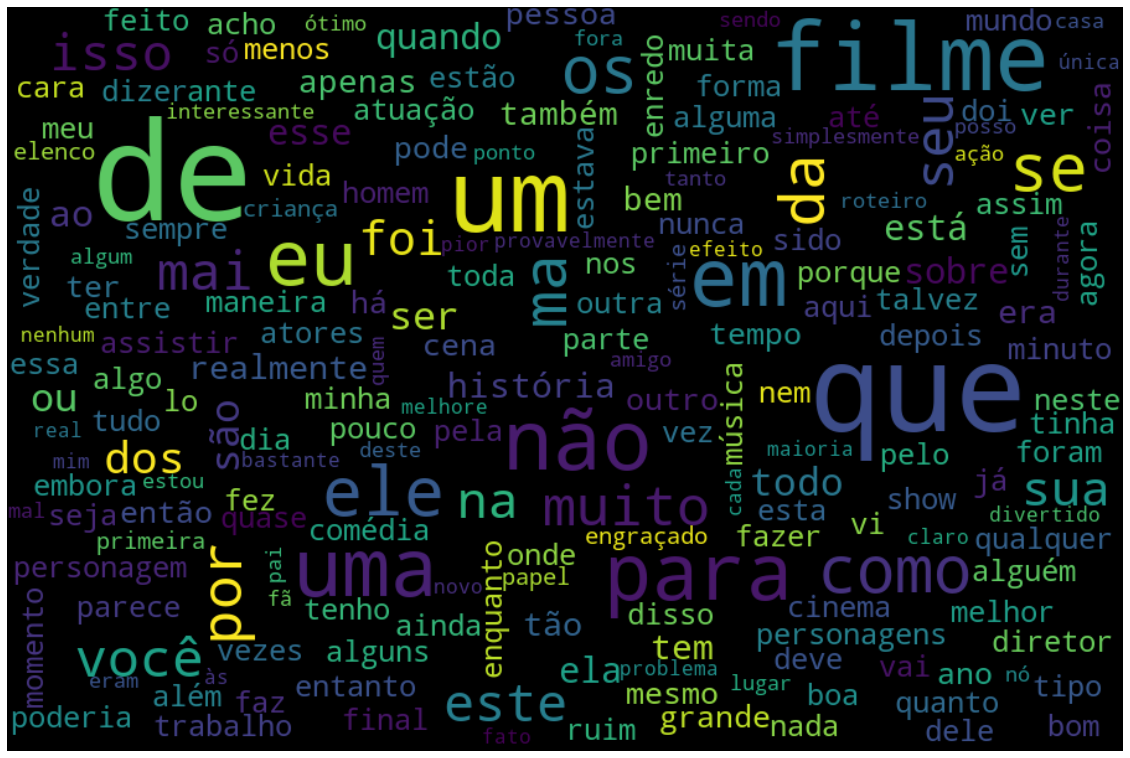

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize = (20,17))
plt.imshow(nuvem_palavras, interpolation='bilinear')
plt.axis("off")
plt.show()


In [14]:
def wc(df_palavras):
  todas_palavras = ' '.join([texto for texto in df_palavras["text_pt"]])
  nuvem_palavras = WordCloud(width=900, height=600, max_font_size = 110, collocations = False
                           ).generate(todas_palavras)
                           #collocations exclui bigramas (duas palavras como se fosse uma)
  plt.figure(figsize = (20,17))
  plt.imshow(nuvem_palavras, interpolation='bilinear')
  plt.axis("off")
  plt.show()

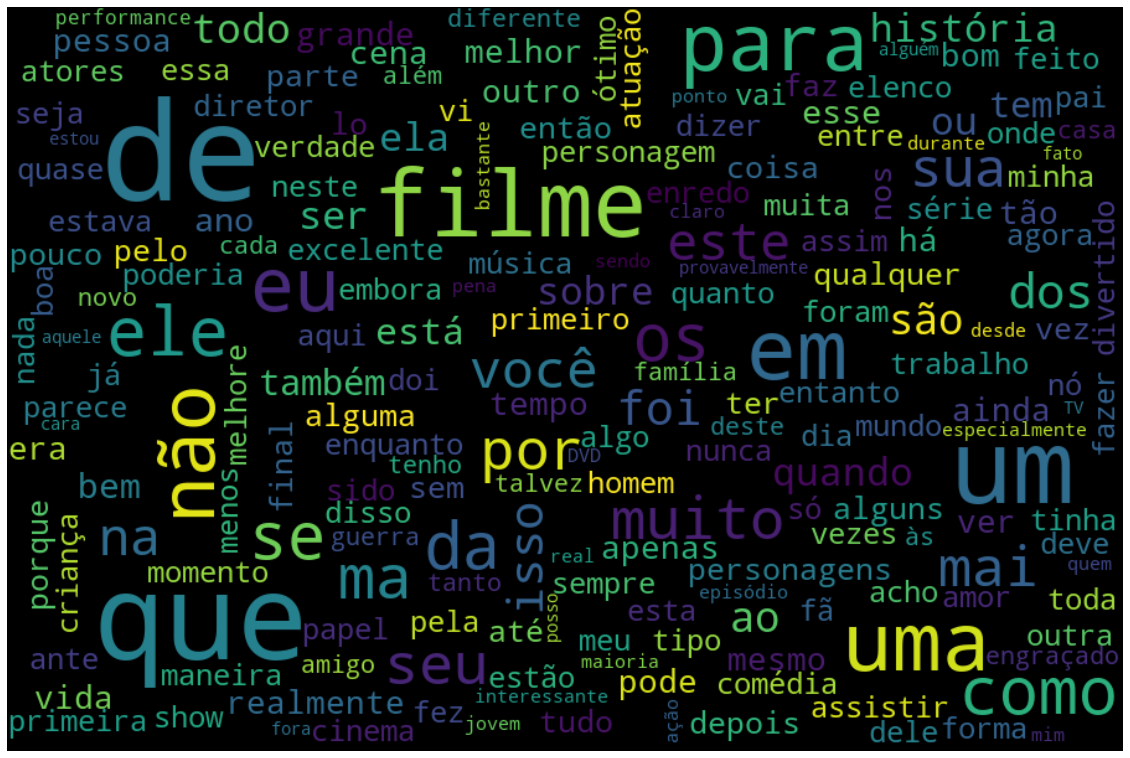

In [15]:
wc(resenha.query("classificacao == 1")) #WORDCLOUD de resenhas positivas

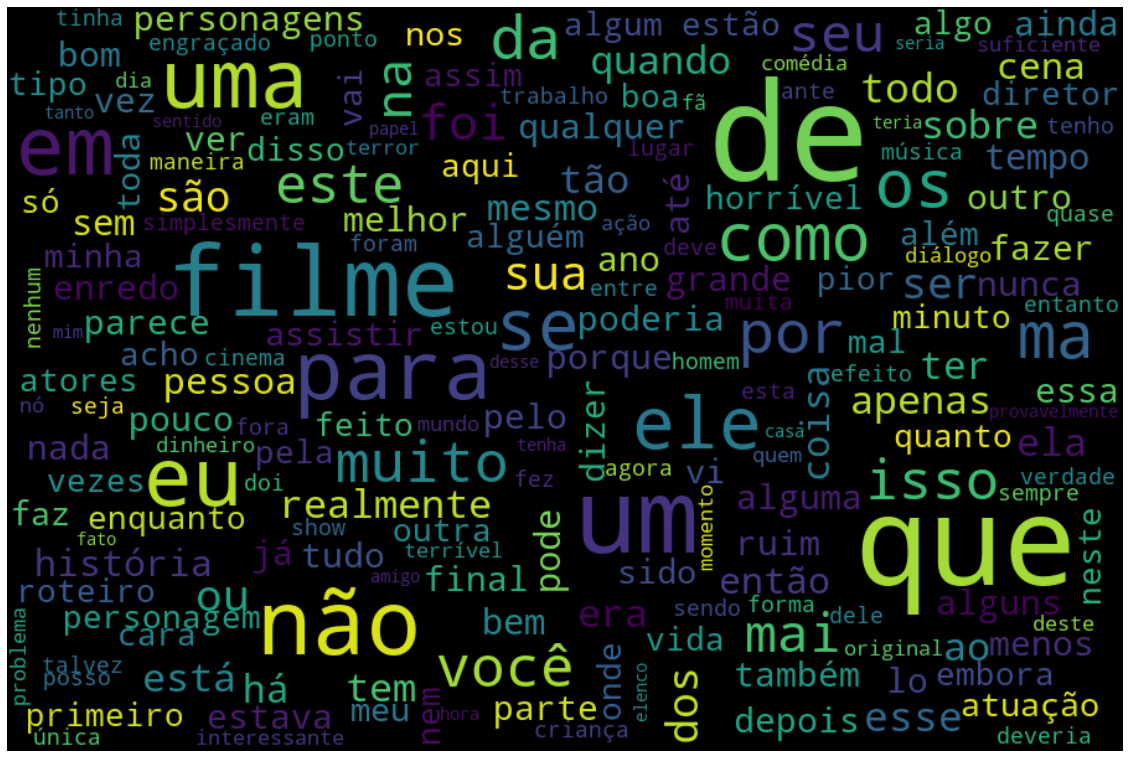

In [16]:
wc(resenha.query("classificacao == 0")) #WORDCLOUD para resenhas negativas

In [17]:
#pip install --user -U nltk #alredy install

In [18]:
#import nltk
#nltk.download("all") #already dowloaded

In [19]:
import nltk
a = ["um filem ruim", "um filme bom"] 
frequencia = nltk.FreqDist(a)
frequencia

FreqDist({'um filem ruim': 1, 'um filme bom': 1})

In [20]:
from nltk import tokenize

frase = "Bem vindo ao mundo do PLN"
token_espaco = tokenize.WhitespaceTokenizer()
token_frase = token_espaco.tokenize(frase)
frequencia = nltk.FreqDist(token_frase)

print(token_frase)
frequencia

['Bem', 'vindo', 'ao', 'mundo', 'do', 'PLN']


FreqDist({'Bem': 1, 'vindo': 1, 'ao': 1, 'mundo': 1, 'do': 1, 'PLN': 1})

In [21]:
token_frase = token_espaco.tokenize(todas_palavras)
frequencia = nltk.FreqDist(token_frase)
df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()), 
                              "Frequencia": list(frequencia.values())})

In [22]:
df_frequencia.nlargest(columns="Frequencia", n = 10)

,Palavra,Frequencia
20,de,417651
14,que,325070
42,e,299743
3,o,244881
7,um,216410
102,a,210179
45,é,192381
200,em,132778
1,uma,130888
29,não,127915


In [27]:
import seaborn as sns

def pareto(texto, coluna_texto, quantidade):

  todas_palavras = ' '.join([texto for texto in texto[coluna_texto]])
  token_frase = token_espaco.tokenize(todas_palavras)
  frequencia = nltk.FreqDist(token_frase)
  df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()), 
                              "Frequencia": list(frequencia.values())})
  plt.figure(figsize=(20,17))
  df_frequencia = df_frequencia.nlargest(columns="Frequencia", n = quantidade)
  ax = sns.barplot(data = df_frequencia,  x = "Palavra", y = "Frequencia", color = 'gray')
  ax.set(ylabel = "Contagem")
  plt.show()


In [28]:

pareto(resenha, "text_pt", 10)

MemoryError: 

In [29]:
#stop word -> palabras irrelevantes
palavras_irrelevantes = nltk.corpus.stopwords.words("portuguese")
print(palavras_irrelevantes)
len(palavras_irrelevantes)

['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um', 'para', 'com', 'não', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'ao', 'ele', 'das', 'à', 'seu', 'sua', 'ou', 'quando', 'muito', 'nos', 'já', 'eu', 'também', 'só', 'pelo', 'pela', 'até', 'isso', 'ela', 'entre', 'depois', 'sem', 'mesmo', 'aos', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'você', 'essa', 'num', 'nem', 'suas', 'meu', 'às', 'minha', 'numa', 'pelos', 'elas', 'qual', 'nós', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'está', 'estamos', 'estão', 'estive', 'esteve', 'estivemos', 'estiveram', 'estava', 'estávamos', 'estavam', 'estivera', 'estivéramos', 'esteja', 'estejamos', 'estejam', 'estivesse', 'estivéssemos', 'estivessem', 'estiver', 'estiv

204

In [ ]:
from string import punctuation

pontuacao = list()
for ponto in punctuation:
  pontuacao.append(ponto)

pontuacao_stopwords = pontuacao + palavras_irrelevantes
token_pontuacao = tokenize.WordPunctTokenizer()



frase_processada = list() #cria lista vazia

for opniao in resenha.text_pt: #itera as resehas
  nova_frase = list() #cria lista de frase vazia
  palavras_texto = token_pontuacao.tokenize(opniao)
  for palavra in palavras_texto:
    if (palavra not in pontuacao_stopwords):
      nova_frase.append(palavra)
  frase_processada.append(' '.join(nova_frase))

resenha["tratamento_1"] = frase_processada

print(len(frase_processada))


In [57]:
del frase_processada

In [58]:
resenha.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_1
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,Mais vez Sr Costner arrumou filme tempo necess...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,Primeiro tudo odeio raps imbecis poderiam agir...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,Filmes fotos latão palavra apropriada verdade ...


In [60]:
classificar_texto(resenha, "tratamento_1", "classificacao", 5)

MemoryError: 

In [63]:
pareto(resenha, "tratamento_1", 2)

MemoryError: 

In [55]:
from nltk import tokenize

frase = "Olá mundo!"
token_pontuacao = tokenize.WordPunctTokenizer()
token_frase = token_pontuacao.tokenize(frase)
print(token_frase)

['Olá', 'mundo', '!']


In [56]:
"""from string import punctuation

pontuacao = list()
for ponto in punctuation:
  pontuacao.append(ponto)

pontuacao_stopwords = pontuacao + palavras_irrelevantes
frase_processada = list()
for opniao in resenha["tratamento_1"]:
  nova_frase = list()
  palavras_texto = token_pontuacao.tokenize(opniao)
  for palavra in palavras_texto:
    if palavra not in pontuacao_stopwords:
      nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))
    print(len(frase_processada))
resenha["tratamento_2"] = frase_processada""" 

'from string import punctuation\n\npontuacao = list()\nfor ponto in punctuation:\n  pontuacao.append(ponto)\n\npontuacao_stopwords = pontuacao + palavras_irrelevantes\nfrase_processada = list()\nfor opniao in resenha["tratamento_1"]:\n  nova_frase = list()\n  palavras_texto = token_pontuacao.tokenize(opniao)\n  for palavra in palavras_texto:\n    if palavra not in pontuacao_stopwords:\n      nova_frase.append(palavra)\n    frase_processada.append(\' \'.join(nova_frase))\n    print(len(frase_processada))\nresenha["tratamento_2"] = frase_processada'